In [117]:
#install packages
import openpyxl
import pandas as pd
import os
import glob
import statsmodels.formula.api as smf
import numpy as np

In [118]:
#Load Excel Data
Math_Scores = pd.read_excel('C:/Users/kahea/Desktop/Homework/2021/Fall/Econ 141/Term Paper Data/Grade 4 Math.xlsx')
Reading_Scores = pd.read_excel('C:/Users/kahea/Desktop/Homework/2021/Fall/Econ 141/Term Paper Data/Grade 4 Reading.xlsx')

In [119]:
#Drop Rows After 2005 (Could actually include every year after NLCB)
Math_Scores = Math_Scores.drop(Math_Scores.index[432:810])
Reading_Scores = Reading_Scores.drop(Reading_Scores.index[424:848])

In [120]:
#Drop Rows
Math_Scores = Math_Scores.drop(index=Math_Scores[Math_Scores['State']=='National public'].index)
Math_Scores = Math_Scores.drop(index=Math_Scores[Math_Scores['State']=='DoDEA'].index)
Math_Scores = Math_Scores.drop(index=Math_Scores[Math_Scores['State']=='Puerto Rico'].index)



In [121]:
#Drop Rows
Reading_Scores = Reading_Scores.drop(index=Reading_Scores[Reading_Scores['State']=='National public'].index)
Reading_Scores = Reading_Scores.drop(index=Reading_Scores[Reading_Scores['State']=='DoDEA'].index)
Reading_Scores = Reading_Scores.drop(index=Reading_Scores[Reading_Scores['State']=='Puerto Rico'].index)

In [157]:
Math_Scores.describe()


,Year,State,Score
count,408,408,408.000000
unique,8,51,408.000000
top,2019,Alabama,229.651002
freq,51,8,1.000000


In [123]:
#Drop Students Column
Math_Scores = Math_Scores.drop('Students', 1)


C:\Users\kahea\AppData\Local\Temp/ipykernel_21840/2968033030.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Math_Scores = Math_Scores.drop('Students', 1)


In [124]:
#Drop Students Column
Reading_Scores = Reading_Scores.drop('Students', 1)

C:\Users\kahea\AppData\Local\Temp/ipykernel_21840/3829267193.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Reading_Scores = Reading_Scores.drop('Students', 1)


In [125]:
Math_Scores

,Year,State,Score
1,2019,Alabama,229.651002
2,2019,Alaska,232.307479
3,2019,Arizona,237.61021
4,2019,Arkansas,233.252134
5,2019,California,234.721976
...,...,...,...
426,2005,Virginia,240.497568
427,2005,Washington,241.684675
428,2005,West Virginia,230.843268
429,2005,Wisconsin,240.568582


In [126]:
#Create New DataFrame non_RTTT_States for State who did not participate
non_RTTT_States = Math_Scores.loc[Math_Scores['State']=='Alaska']
df1 = Math_Scores.loc[Math_Scores['State']=='North Dakota']
df2 = Math_Scores.loc[Math_Scores['State']=='Texas']
df3 = Math_Scores.loc[Math_Scores['State']=='Vermont']
non_RTTT_States = non_RTTT_States.append(df1)
non_RTTT_States = non_RTTT_States.append(df2)
non_RTTT_States = non_RTTT_States.append(df3)

In [127]:
non_RTTT_States

,Year,State,Score
2,2019,Alaska,232.307479
56,2017,Alaska,230.456278
110,2015,Alaska,236.328417
164,2013,Alaska,236.122004
218,2011,Alaska,236.359658
272,2009,Alaska,237.212284
326,2007,Alaska,237.273893
380,2005,Alaska,235.510706
36,2019,North Dakota,242.928391
90,2017,North Dakota,244.243515


In [128]:
#create dataframe after grouping data by average score for each year and indexing by year
#Math_Scores['RTTT States'] = RTTT_States.groupby('Year')['Score'].mean()

df = non_RTTT_States.groupby('Year')['Score'].mean()

In [129]:
#put into pandas dataframe
non_RTTT_States_avg = pd.DataFrame(df)

In [130]:
non_RTTT_States_avg

,Score
Year,
2005,240.941868
2007,242.846728
2009,242.658415
2011,242.314399
2013,243.069096
2015,242.073780
2017,239.134190
2019,239.438077


,Score
Year,
2005,240.941868
2007,242.846728
2009,242.658415
2011,242.314399
2013,243.069096
2015,242.073780
2017,239.134190
2019,239.438077


In [131]:
#create dataframe for RTTT_States
RTTT_States = Math_Scores


In [132]:
#drop rows
RTTT_States = RTTT_States.drop(index=RTTT_States[RTTT_States['State']=='Alaska'].index)
RTTT_States = RTTT_States.drop(index=RTTT_States[RTTT_States['State']=='North Dakota'].index)
RTTT_States = RTTT_States.drop(index=RTTT_States[RTTT_States['State']=='Texas'].index)
RTTT_States = RTTT_States.drop(index=RTTT_States[RTTT_States['State']=='Vermont'].index)
print(RTTT_States)

     Year          State       Score
1    2019        Alabama  229.651002
3    2019        Arizona   237.61021
4    2019       Arkansas  233.252134
5    2019     California  234.721976
6    2019       Colorado  241.865586
..    ...            ...         ...
426  2005       Virginia  240.497568
427  2005     Washington  241.684675
428  2005  West Virginia  230.843268
429  2005      Wisconsin  240.568582
430  2005        Wyoming  242.955914

[376 rows x 3 columns]


In [133]:
#put into pandas dataframe
RTTT_States = pd.DataFrame(RTTT_States)


In [134]:
RTTT_States

,Year,State,Score
1,2019,Alabama,229.651002
3,2019,Arizona,237.61021
4,2019,Arkansas,233.252134
5,2019,California,234.721976
6,2019,Colorado,241.865586
...,...,...,...
426,2005,Virginia,240.497568
427,2005,Washington,241.684675
428,2005,West Virginia,230.843268
429,2005,Wisconsin,240.568582


In [135]:
#group data by average score and index by year
RTTT_States = RTTT_States.groupby('Year')['Score'].mean()

In [136]:
#put into pandas dataframe
RTTT_States = pd.DataFrame(RTTT_States)

In [137]:
#rename column label
RTTT_States = RTTT_States.rename(columns={'Score': 'RTTT States'})

In [138]:
RTTT_States

,RTTT States
Year,
2005,236.722477
2007,238.832746
2009,239.250084
2011,240.320646
2013,241.790816
2015,240.077103
2017,239.208621
2019,239.721019


In [139]:
#create column of data for states not participating in RTTT
RTTT_States['Non-RTTT States'] = non_RTTT_States_avg

In [140]:
RTTT_States

,RTTT States,Non-RTTT States
Year,,
2005,236.722477,240.941868
2007,238.832746,242.846728
2009,239.250084,242.658415
2011,240.320646,242.314399
2013,241.790816,243.069096
2015,240.077103,242.073780
2017,239.208621,239.134190
2019,239.721019,239.438077


<AxesSubplot:xlabel='Year'>

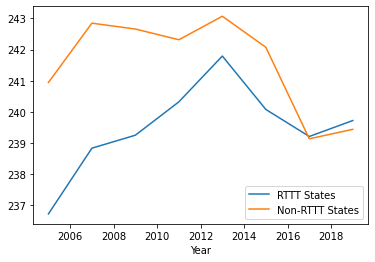

In [141]:
RTTT_States.plot()

In [143]:
RTTT_States.describe()

,RTTT States,Non-RTTT States
count,8.000000,8.000000
mean,239.490439,241.559569
std,1.444679,1.546509
min,236.722477,239.134190
25%,239.114652,240.565920
50%,239.485552,242.194090
75%,240.137988,242.705493
max,241.790816,243.069096


In [93]:
#create empty treatment variable column
RTTT_States['Treatment'] = 0

In [94]:
#create dummy variable for years after 2010 to indicate treatment
RTTT_States['Treatment'] = RTTT_States.Treatment.where(RTTT_States.index<2010,1)

<AxesSubplot:xlabel='Year'>

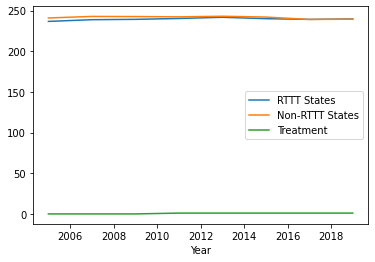

In [62]:
RTTT_States.plot()

In [95]:
#group data by indicator
result = RTTT_States.groupby('Treatment').mean()
result

,RTTT States,Non-RTTT States
Treatment,,
0,238.268436,242.149004
1,240.223641,241.205908


In [96]:
#label columns yes for treatment, no for no treatment
result.columns = ['Yes','No']
result

,Yes,No
Treatment,,
0,238.268436,242.149004
1,240.223641,241.205908


In [97]:
#subtract non treatment data by treated data to get values before treatment
result['No'] - result['Yes']

Treatment
0    3.880568
1    0.982267
dtype: float64

In [98]:
#to get values after treatment
(result['No'] - result['Yes']).diff()

Treatment
0       NaN
1   -2.8983
dtype: float64

,RTTT States,Non-RTTT States,Treatment
Year,,,
2005,236.722477,240.941868,0
2007,238.832746,242.846728,0
2009,239.250084,242.658415,0
2011,240.320646,242.314399,1
2013,241.790816,243.069096,1
2015,240.077103,242.073780,1
2017,239.208621,239.134190,1
2019,239.721019,239.438077,1


C:\Users\kahea\AppData\Local\Temp/ipykernel_31024/2673258765.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Modeldf = Modeldf.drop('Treatment', 1)


,RTTT States,Non-RTTT States
Year,,
2005,236.722477,240.941868
2007,238.832746,242.846728
2009,239.250084,242.658415
2011,240.320646,242.314399
2013,241.790816,243.069096
2015,240.077103,242.073780
2017,239.208621,239.134190
2019,239.721019,239.438077


Year                 
2005  RTTT States        236.722477
      Non-RTTT States    240.941868
2007  RTTT States        238.832746
      Non-RTTT States    242.846728
2009  RTTT States        239.250084
      Non-RTTT States    242.658415
2011  RTTT States        240.320646
      Non-RTTT States    242.314399
2013  RTTT States        241.790816
      Non-RTTT States    243.069096
2015  RTTT States        240.077103
      Non-RTTT States    242.073780
2017  RTTT States        239.208621
      Non-RTTT States    239.134190
2019  RTTT States        239.721019
      Non-RTTT States    239.438077
dtype: float64

0
Year                            
2005 RTTT States      236.722477
     Non-RTTT States  240.941868
2007 RTTT States      238.832746
     Non-RTTT States  242.846728
2009 RTTT States      239.250084
     Non-RTTT States  242.658415
2011 RTTT States      240.320646
     Non-RTTT States  242.314399
2013 RTTT States      241.790816
     Non-RTTT States  243.069096
2015 RTTT States      240.077103
     Non-RTTT States  242.073780
2017 RTTT States      239.208621
     Non-RTTT States  239.134190
2019 RTTT States      239.721019
     Non-RTTT States  239.438077

Scores
Year                            
2005 RTTT States      236.722477
     Non-RTTT States  240.941868
2007 RTTT States      238.832746
     Non-RTTT States  242.846728
2009 RTTT States      239.250084
     Non-RTTT States  242.658415
2011 RTTT States      240.320646
     Non-RTTT States  242.314399
2013 RTTT States      241.790816
     Non-RTTT States  243.069096
2015 RTTT States      240.077103
     Non-RTTT States  242.073780
2017 RTTT States      239.208621
     Non-RTTT States  239.134190
2019 RTTT States      239.721019
     Non-RTTT States  239.438077

Group  Group
Year                                   
2005 RTTT States      236.722477      0
     Non-RTTT States  240.941868      0
2007 RTTT States      238.832746      0
     Non-RTTT States  242.846728      0
2009 RTTT States      239.250084      0
     Non-RTTT States  242.658415      0
2011 RTTT States      240.320646      0
     Non-RTTT States  242.314399      0
2013 RTTT States      241.790816      0
     Non-RTTT States  243.069096      0
2015 RTTT States      240.077103      0
     Non-RTTT States  242.073780      0
2017 RTTT States      239.208621      0
     Non-RTTT States  239.134190      0
2019 RTTT States      239.721019      0
     Non-RTTT States  239.438077      0

In [125]:
#Read in data
DiffinDiff = pd.read_excel('C:/Users/kahea/Desktop/Homework/2021/Fall/Econ 141/Term Paper Data/Stacked Data.xlsx')


In [127]:
DiffinDiff['RTTT_States_Treatment'] = np.where(DiffinDiff.Group=='RTTT States',1,0)

In [133]:
DiffinDiff['Treatment']=0

In [137]:
DiffinDiff['Treatment'] = DiffinDiff.Treatment.where(DiffinDiff.Year<2010,1)

In [138]:
DiffinDiff

,Year,Group,Scores,RTTT_States_Treatment,Treatment
0,2019,RTTT States,239.721019,1,1
1,2019,Non-RTTT States,239.438077,0,1
2,2017,RTTT States,239.208621,1,1
3,2017,Non-RTTT States,239.134190,0,1
4,2015,RTTT States,240.077103,1,1
5,2015,Non-RTTT States,242.073780,0,1
6,2013,RTTT States,241.790816,1,1
7,2013,Non-RTTT States,243.069096,0,1
8,2011,RTTT States,240.320646,1,1
9,2011,Non-RTTT States,242.314399,0,1


In [139]:
#creating model
#score = RTTT_State + after2010 + RTTT_State*after2010
model = 'Scores ~ RTTT_States_Treatment + Treatment + Treatment * RTTT_States_Treatment'

In [140]:
mod = smf.ols(formula=model, data=DiffinDiff)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     4.612
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0228
Time:                        13:06:12   Log-Likelihood:                -25.436
No. Observations:                  16   AIC:                             58.87
Df Residuals:                      12   BIC:                             61.96
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

c:\users\kahea\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [144]:
#Create New DataFrame non_RTTT_States for State who did not participate
non_RTTT_States_Reading = Reading_Scores.loc[Reading_Scores['State']=='Alaska']
df4 = Reading_Scores.loc[Reading_Scores['State']=='North Dakota']
df5 = Reading_Scores.loc[Reading_Scores['State']=='Texas']
df6 = Reading_Scores.loc[Reading_Scores['State']=='Vermont']
non_RTTT_States_Reading = non_RTTT_States_Reading.append(df4)
non_RTTT_States_Reading = non_RTTT_States_Reading.append(df5)
non_RTTT_States_Reading = non_RTTT_States_Reading.append(df6)

In [145]:
dfRead = non_RTTT_States_Reading.groupby('Year')['Score'].mean()

In [146]:
non_RTTT_States_Reading_avg = pd.DataFrame(dfRead)

In [147]:
RTTT_States_Reading = Reading_Scores


In [148]:
#drop rows
RTTT_States_Reading = RTTT_States_Reading.drop(index=RTTT_States_Reading[RTTT_States_Reading['State']=='Alaska'].index)
RTTT_States_Reading = RTTT_States_Reading.drop(index=RTTT_States_Reading[RTTT_States_Reading['State']=='North Dakota'].index)
RTTT_States_Reading = RTTT_States_Reading.drop(index=RTTT_States_Reading[RTTT_States_Reading['State']=='Texas'].index)
RTTT_States_Reading = RTTT_States_Reading.drop(index=RTTT_States_Reading[RTTT_States_Reading['State']=='Vermont'].index)
print(RTTT_States_Reading)

     Year          State       Score
1    2019        Alabama   211.72852
3    2019        Arizona  215.841231
4    2019       Arkansas  215.054222
5    2019     California  216.481266
6    2019       Colorado  224.862437
..    ...            ...         ...
419  2005       Virginia  225.813711
420  2005     Washington  223.486398
421  2005  West Virginia  214.767066
422  2005      Wisconsin  221.164227
423  2005        Wyoming  223.262146

[376 rows x 3 columns]


In [149]:
RTTT_States_Reading = pd.DataFrame(RTTT_States_Reading)


In [150]:
#group data by average score and index by year
RTTT_States_Reading = RTTT_States_Reading.groupby('Year')['Score'].mean()

In [151]:
#put into pandas dataframe
RTTT_States_Reading = pd.DataFrame(RTTT_States_Reading)

In [152]:
#rename column label
RTTT_States_Reading = RTTT_States_Reading.rename(columns={'Score': 'RTTT States'})

In [153]:
#create column of data for states not participating in RTTT
RTTT_States_Reading['Non-RTTT States'] = non_RTTT_States_Reading_avg

In [154]:
RTTT_States_Reading

,RTTT States,Non-RTTT States
Year,,
2005,217.921829,220.373060
2007,220.197319,222.163822
2009,220.061872,221.172224
2011,220.287371,219.648427
2013,221.171512,219.581697
2015,222.186149,221.381529
2017,221.404052,217.470183
2019,219.781413,215.855372


<AxesSubplot:xlabel='Year'>

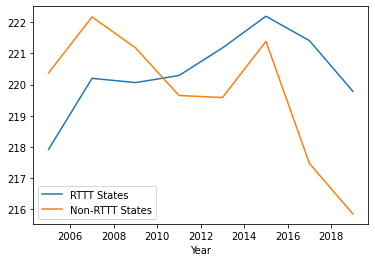

In [155]:
RTTT_States_Reading.plot()

In [156]:
RTTT_States_Reading.describe()

,RTTT States,Non-RTTT States
count,8.000000,8.000000
mean,220.376439,219.705789
std,1.280698,2.114171
min,217.921829,215.855372
25%,219.991757,219.053819
50%,220.242345,220.010744
75%,221.229647,221.224550
max,222.186149,222.163822


In [111]:
#create empty treatment variable column
RTTT_States_Reading['Treatment'] = 0

In [112]:
#create dummy variable for years after 2010 to indicate treatment
RTTT_States_Reading['Treatment'] = RTTT_States_Reading.Treatment.where(RTTT_States_Reading.index<2010,1)

In [113]:
RTTT_States_Reading

,RTTT States,Non-RTTT States,Treatment
Year,,,
2005,217.921829,220.373060,0
2007,220.197319,222.163822,0
2009,220.061872,221.172224,0
2011,220.287371,219.648427,1
2013,221.171512,219.581697,1
2015,222.186149,221.381529,1
2017,221.404052,217.470183,1
2019,219.781413,215.855372,1


In [114]:
#group data by indicator
result_Reading = RTTT_States_Reading.groupby('Treatment').mean()
result_Reading

,RTTT States,Non-RTTT States
Treatment,,
0,219.393673,221.236369
1,220.966099,218.787442


In [116]:
#label columns yes for treatment, no for no treatment
result_Reading.columns = ['Yes','No']
result_Reading

,Yes,No
Treatment,,
0,219.393673,221.236369
1,220.966099,218.787442


In [20]:
#subtract non treatment data by treated data to get values before treatment
result_Reading['No'] - result_Reading['Yes']

Treatment
0    1.842696
1   -2.178658
dtype: float64

In [21]:
#to get values after treatment
(result_Reading['No'] - result_Reading['Yes']).diff()

Treatment
0         NaN
1   -4.021353
dtype: float64

In [23]:
#Read in data
DiffinDiff_Reading = pd.read_excel('C:/Users/kahea/Desktop/Homework/2021/Fall/Econ 141/Term Paper Data/Stacked Reading Data.xlsx')


In [24]:
DiffinDiff_Reading['RTTT_States_Treatment'] = np.where(DiffinDiff_Reading.Group=='RTTT States',1,0)

In [25]:
DiffinDiff_Reading['Treatment']=0

In [26]:
DiffinDiff_Reading['Treatment'] = DiffinDiff_Reading.Treatment.where(DiffinDiff_Reading.Year<2010,1)

In [27]:
DiffinDiff_Reading

,Year,Group,Scores,RTTT_States_Treatment,Treatment
0,2019,RTTT States,219.781413,1,1
1,2019,Non-RTTT States,215.855372,0,1
2,2017,RTTT States,221.404052,1,1
3,2017,Non-RTTT States,217.470183,0,1
4,2015,RTTT States,222.186149,1,1
5,2015,Non-RTTT States,221.381529,0,1
6,2013,RTTT States,221.171512,1,1
7,2013,Non-RTTT States,219.581697,0,1
8,2011,RTTT States,220.287371,1,1
9,2011,Non-RTTT States,219.648427,0,1


In [28]:
#creating model
#score = RTTT_State + after2010 + RTTT_State*after2010
model_Reading = 'Scores ~ RTTT_States_Treatment + Treatment + Treatment * RTTT_States_Treatment'

In [30]:
mod_Reading = smf.ols(formula=model_Reading, data=DiffinDiff_Reading)
res_Reading = mod_Reading.fit()
print(res_Reading.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     2.630
Date:                Tue, 07 Dec 2021   Prob (F-statistic):             0.0980
Time:                        03:43:03   Log-Likelihood:                -26.856
No. Observations:                  16   AIC:                             61.71
Df Residuals:                      12   BIC:                             64.80
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

c:\users\kahea\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
